In [14]:
package TruckModel {

  // Part Definitions
  part def Engine {
    port powerOutput;
  }

  part def Transmission {
    port powerInput;
    port torqueOutput;
  }

  part def Drivetrain {
    port torqueInput;
    port frontTorqueOutput;
    port rearTorqueOutput;
  }

  part def Wheel {
    port torqueInput;
    port brakeInput;
    port steeringInput;
  }

  part def Suspension {
    port input;
  }

  part def Brakes {
      port input;
  }

  part def SteeringSystem {
    port input;
  }

  part def Frame {
    port output;
    port input;
  }

  part def Cab {
    // No ports needed for Cab in this model
  }

  part def CargoArea {
    // No ports needed for CargoArea in this model
  }

  // Part Usage
  part def truck {

    // Composite Parts
    part engine : Engine;
    part transmission : Transmission;
    part drivetrain : Drivetrain;
    part frontWheels : Wheel [2];
    part rearWheels : Wheel [2];
    part suspension : Suspension;
    part brakes : Brakes;
    part steeringSystem : SteeringSystem;
    part framev : Frame;
    part cab : Cab;
    part cargoArea : CargoArea;

    // Connections
    connect engine.powerOutput to transmission.powerInput;
    connect transmission.torqueOutput to drivetrain.torqueInput;
    connect drivetrain.frontTorqueOutput to frontWheels.torqueInput;
    connect drivetrain.rearTorqueOutput to rearWheels.torqueInput;
    connect suspension.input to framev.output;
    connect brakes.input to frontWheels.brakeInput;
    connect brakes.input to rearWheels.brakeInput;
    connect steeringSystem.input to frontWheels.steeringInput;

  }

}

Package TruckModel (c0992495-6b20-4ca6-8ebc-5dad8b37a5d5)


In [16]:
package TruckVerificationTests {
    
    import TruckModel::*;
    import ScalarValues::*; //defines common data types like Boolean 

    // Verification test for engine to transmission connection
    verification def EngineTransmissionConnectionTest {
        subject testTruck : truck;

        objective engineTransmissionConnectionObjective {
            doc /* Verify the engine power output is connected to the transmission power input */
        }

        action evaluateConnection {
            in truck = testTruck;
            out verdict : Boolean = 
                testTruck.engine.powerOutput == testTruck.transmission.powerInput;
        }
        
        return verdict : Boolean = evaluateConnection.verdict;
    }

    // Verification test for transmission to drivetrain connection  
    verification def TransmissionDrivetrainConnectionTest {
        subject testTruck : truck;

        objective transmissionDrivetrainConnectionObjective {
            doc /* Verify the transmission torque output is connected to the drivetrain torque input */
        }

        action evaluateConnection {
            out verdict : Boolean = 
                testTruck.transmission.torqueOutput == testTruck.drivetrain.torqueInput;
        }

        return verdict : Boolean = evaluateConnection.verdict;
    }

    // Verification test for drivetrain to wheel connections
    verification def DrivetrainWheelConnectionTest {
        subject testTruck : truck;

        objective drivetrainWheelConnectionObjective {
            doc /* Verify the drivetrain torque outputs are connected to the correct wheels */
        }
        
        action evaluateConnections {
            in truck = testTruck;
            out verdict : Boolean = 
                testTruck.drivetrain.frontTorqueOutput == testTruck.frontWheels.torqueInput and
                testTruck.drivetrain.rearTorqueOutput == testTruck.rearWheels.torqueInput;
        }

        return verdict : Boolean = evaluateConnections.verdict;
    }

    // Verification test for brake connections
    verification def BrakeConnectionTest {
        subject testTruck : truck;
        
        objective brakeConnectionObjective {
            doc /* Verify the brakes are connected to all wheels */
        }

        action evaluateConnections {
            in truck = testTruck;
            out verdict : Boolean = 
                testTruck.brakes.input == testTruck.frontWheels.brakeInput and
                testTruck.brakes.input == testTruck.rearWheels.brakeInput;
        }

        return verdict : Boolean = evaluateConnections.verdict;
    }

    // Verification test for steering system connection
    verification def SteeringSystemConnectionTest {
        subject testTruck : truck;

        objective steeringSystemConnectionObjective {
            doc /* Verify the steering system is connected to the front wheels */
        }

        action evaluateConnection {
            in truck = testTruck;
            out verdict : Boolean = 
                testTruck.steeringSystem.input == testTruck.frontWheels.steeringInput;
        }
        
        return verdict : Boolean = evaluateConnection.verdict;
    }
}

Package TruckVerificationTests (ac891286-079f-4e10-9c82-89ac86100764)


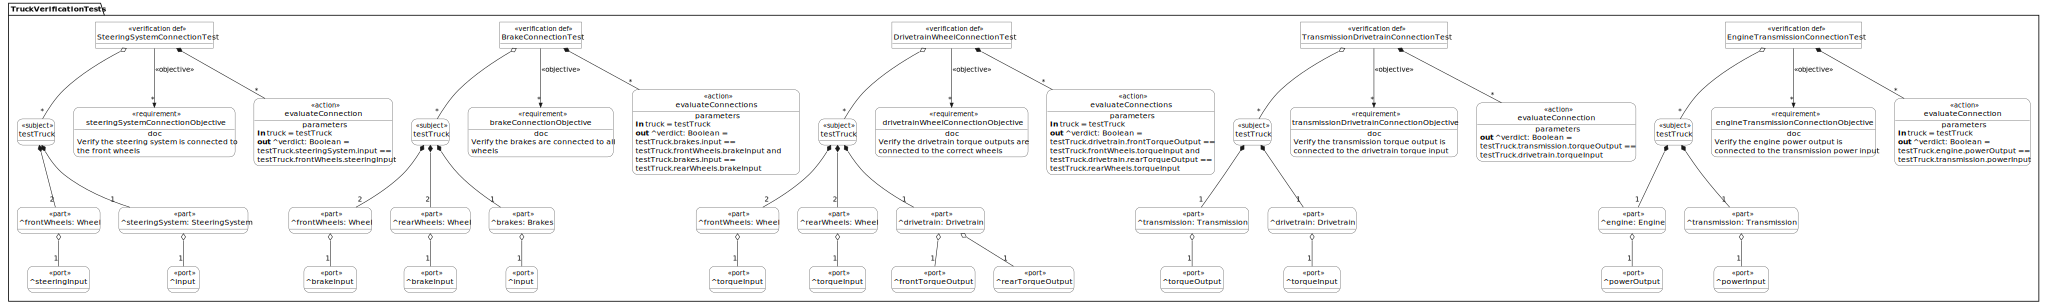

In [17]:
%viz --view=Tree TruckVerificationTests